<a href="https://colab.research.google.com/github/TUIlmenauAMS/GVT_Lecture_Colab/blob/main/GVT_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture Fundamentals of Video Technology**

## Gerald Schuller

## Gerald.schuller@tu-ilmenau.de

#**Sampling, Frequency**

We have seen that the color components can be "downsampled" horizontally and vertically by a factor of two. The same happens in the retina: 110 million rods and 6 million cones are fed into only about 1 million nerve fibers.

How do we make this downsampling correct?

What can go wrong? 

To do this, we do an **experiment in Python**:

We are again streaming our video signal, but horizontally and vertically we show only every Nth pixel. In this way we get a downsampling by the factor N in both directions, which means we only keep every $N^{th}$ sample in both directions. In this example, N = 4.

Important in the Python Script “videoresampley.py”:

-Initialize the downsampled frame:

In [123]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

[ret, frame] = cap.read() 
print(ret)
[rows,cols,c] = frame.shape; 
Ds=np.zeros((rows,cols));

False


AttributeError: ignored

-Creating the downsampled Frame, keeping the zeros in place:

In [ ]:
Y=(0.114*frame[:,:,0]+0.587*frame[:,:,1]+0.299*frame[:,:,2])/256;        

Ds[0::N,::N] = Y[0::N,::N];

TypeError: ignored

The notation **[a:b:N]** means: the indices starting from a up to (not including) b, in steps of N. Dropping b means: until the end. 
The abbreviation **0::N** means: The indices from 0 to the end in steps of N, thus here in the horizontal and vertical direction. 
So we have a **matrix of zeros** of the size of our video frame, and then only **every $N^{th}$ pixel** is written horizontally and vertically.

#**Python Example:**

In [ ]:
import numpy as np

Y = np.ones((8,8))
print(Y)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


In [ ]:
Ds=np.zeros((8,8))
N=4
Ds[0::N,::N]=Y[0::N,::N]

print(Ds)

[[1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


**Observe:** Only every 4th sample “survives” the downsampling, the others become zero.

**Example:** 
We can try it out with video, with:
python videoresampley.py

**Note:** The video appears to consist of many **small points**, the pixels that “survived”, but the content is still clearly recognizable.

Next we will produce a **test image**, consisting of strips which we create by means of a sine function for the brightness. We produce a **sine wave with 100 cycles** over **1000 pixels**, which is shifted to the positive range and scaled to the range of 0, ..., 1:

In [ ]:
f=100
sinewave = (1.0 + np.sin(np.linspace(0 , 2*np.pi*f , 1000)))/2

The addition of 1.0 is to obtain only positive brightness values and to divide by 2 to obtain a maximum brightness value of 1.0, which expects cv2.imwrite at float values.

Subsequently, we produce 500 equal rows with this sinusoidal oscillation of 1000 pixels. To do this we apply a matrix "trick": We set the sine values on the diagonal of a 1000x1000 diagonal matrix, which we multiply from the left with a 500x1000 matrix consisting of ones:

In [ ]:
d=np.diag(sinewave) 
#Matrix with sinewave from left to right, #identically on each row, with 500 rows: 
A=np.dot(np.ones((500,1000)),d) 

This results in a matrix of **500 lines of the sine wave**. This matrix is then **displayed** as a frame and **stored** in a jpg file (for printing).

Try out with:

*python horizortsfreq.py*

**Note**: We get a field with 100 vertical black/white stripes with smooth transitions.

**Note**: Our used sine wave has a **frequency**, namely these 100 cycles across the width of the rows. In order to distinguish this frequency from time frequencies (in oscillations per second or hertz), we call it "**spatial frequency**". Units: "**cycles per length**" (here the width of our rows). Instead of the length, it is often more practical to specify the angle under which our rows appear to the viewer. Then we get the unit "**cycles per degree**" 

We only print out this image and use it as a test image by holding the strip image at a **medium distance** in front of the camera and watching the **downsampled image**.  

**We see**: On the downsampled image, the original stripe pattern now appears, but a **new pattern** of wave lines and slower light-dark fluctuations, which have no resemblance to the original!
We call these new patterns "**Moire**" or "**Aliasing**" in digital signal processing.

**Note**: If we hold the stripes closer to the camera so that they appear larger (**fewer brightness cycles per degree** appear on the camera), the aliasing or moire effects **disappear**.

Example of an image:

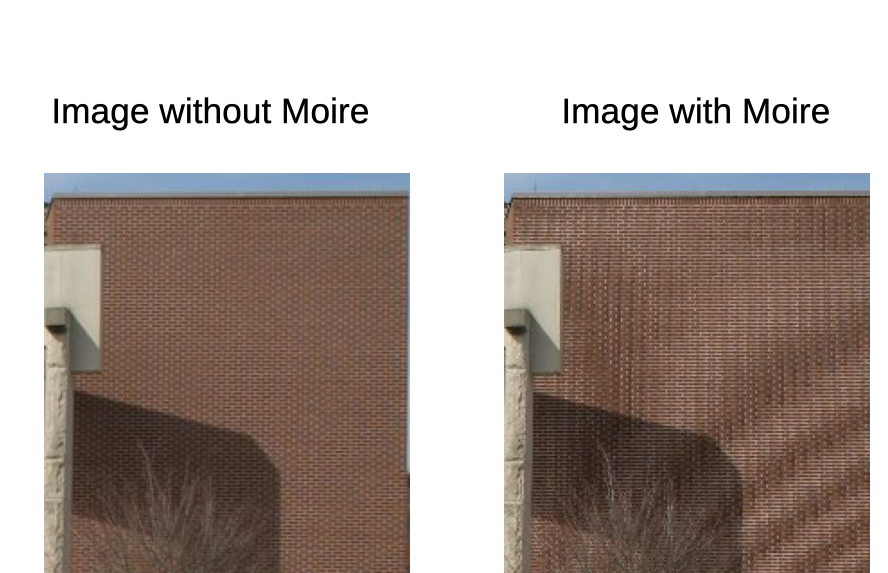

from: http://en.wikipedia.org/wiki/Moire

How does our retina perform its type of "downsampling", the reduction to only 1 million nerve fibers? We assume that here the problem of aliasing or Moire was solved.

When we look at the retina, we recognize so-called **receptive fields** of the visual nerve cells. These represent the interconnection of many rods and cones to a central optic nerve. This interconnection is such that it also has a so-called **lateral inhibition**, which is outlined below.

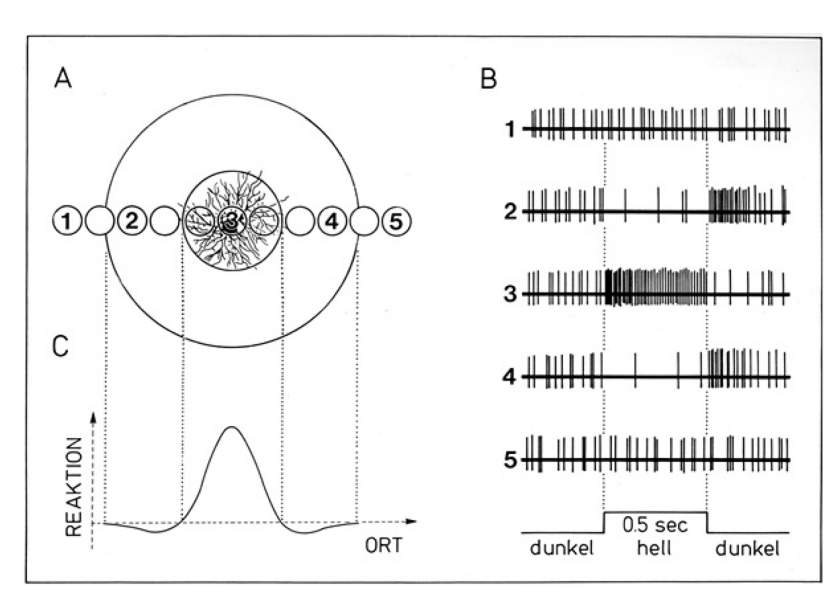

(from: http://www.pattern-project.org/heinz-waessle-vortrag)

**We see**: light incidence on light cells on the edge of these receptive fields **reduce** the output of the visual nerve cell (locations (2) and (4))! Hence the name "lateral inhibition".

Further presentation of the receptive fields on the retina:

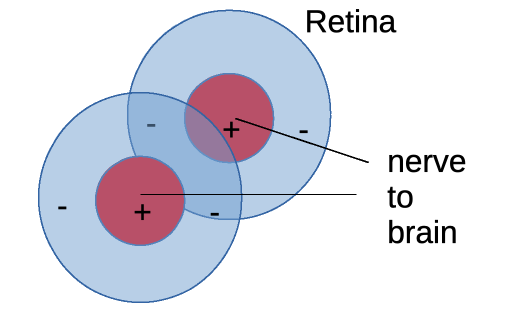

**Note**: Light in center, in „+“ area, leads to increase of the signal in nerve to brain, light on the edge, in „-“ area, leads to **reduction** of the nerve Signal. 

**Note**: The receptive fields **overlap**.

Illustration from the “side”:

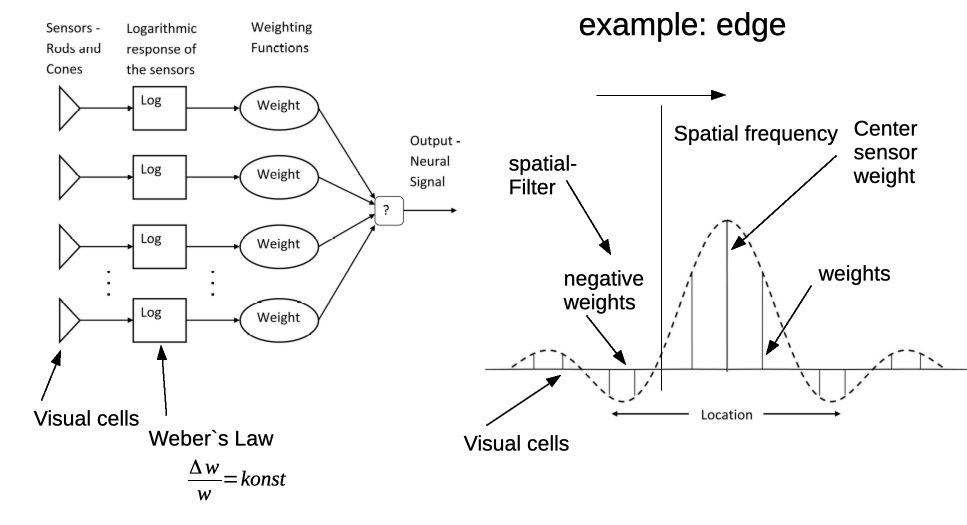

Delta perception proportional to the perception 

→ Compression of value range for nerves. From:http://www.ee.sieu.edu/~sumbaug/CVIPbook_PPLec/Chapter7.ppt

→ Multiplication by a factor corresponds to a perception of an additive change.

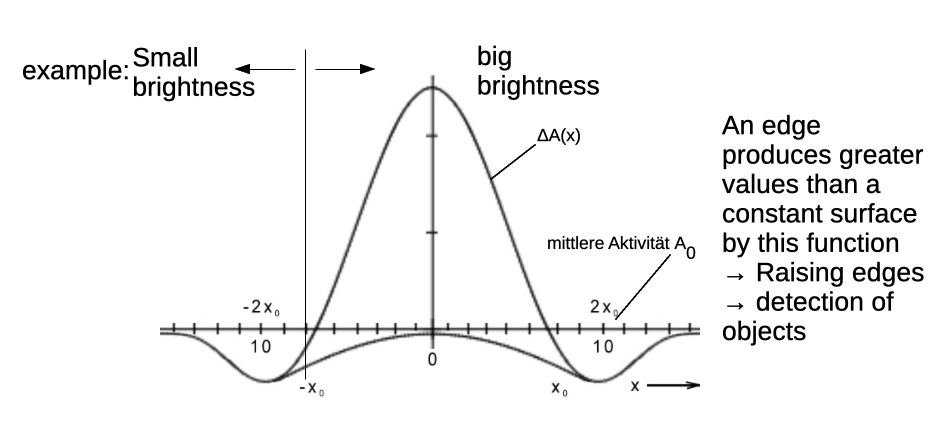

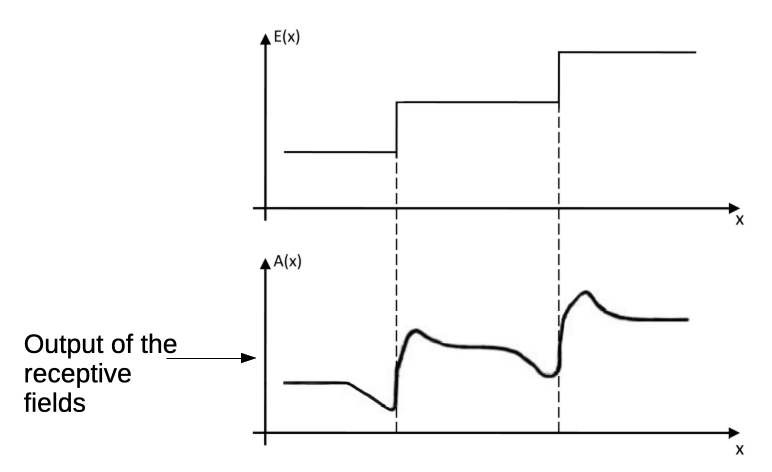

from: H. Weisleder

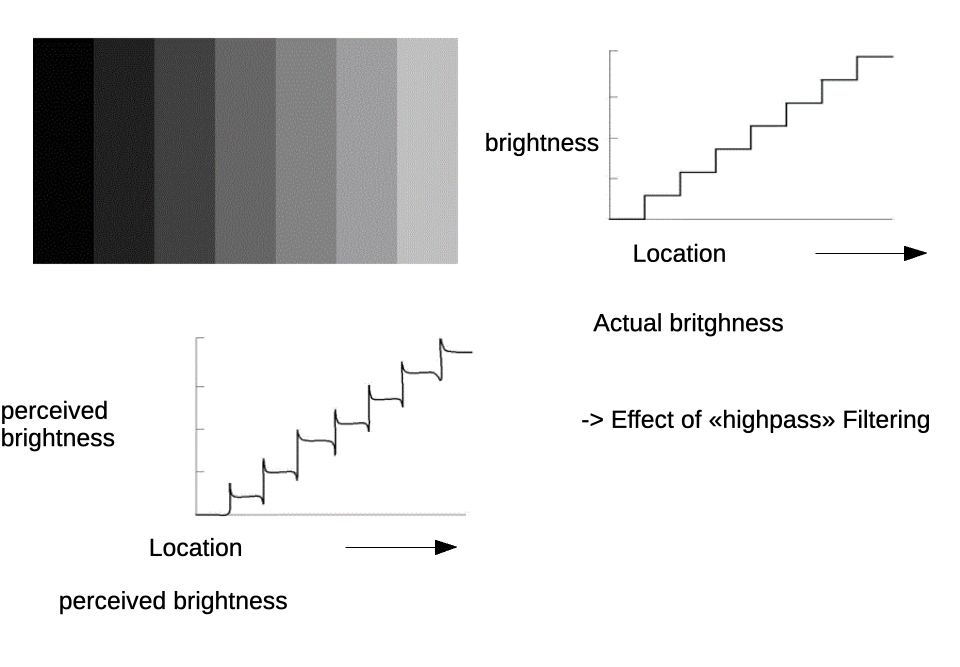

From:www.ee.siue.edu/~sumbaug/CVIPbook_PPLec/Chapter7.ppt

The weight distribution of the receptive fields is similar to a so-called **Si function** (see, for example, http://en.wikipedia.org/wiki/Sinc_function) 

Definition: 

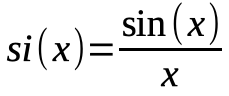

An alternative definition is the so called **Sinc Function**:

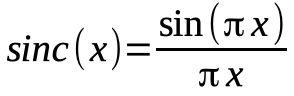

We plot a Si function in python:

Text(0.5, 1.0, 'Si-Function')

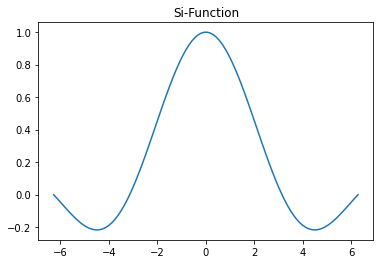

In [ ]:
import matplotlib.pyplot as plt

x=np.linspace(-6.28,6.28,100)

plt.plot(x,np.sin(x)/x)

plt.title("Si-Function")

This function has special properties in the so-called **Discrete Fourier Transformation**, or **DFT** for short.

#**Discrete Fourier Transform**

We have seen that in the case of **aliasing** the **number of brightness oscillations per degree** is important. Therefore, it would be helpful if we could present our image or signal by a **sum of different sinusoidal functions**. 

We obtain this by using the Discrete Fourier Transform.

We start from a signal , $x(n)$ e.g. the intensity values (Liminance), along a row of our picture, or also e.g. the samples of an audio signal ,having a number (length) of N samples, with the sample index in the range $0 ≤ N ≤ N-1$. 
N is also called the blocksize or size of the DFT.

The **DFT** of  is defined as:

$(1)$

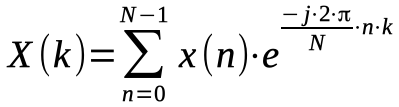

$X(k)$ are the resulting N coefficients of the DFT decomposition, with the frequency index k in range $0 ≤ k ≤ N-1$.

The **inverse DFT** takes these N **coefficients** to form a **weighted sum of oscillations** representing the original signal x (n):

$(2)$

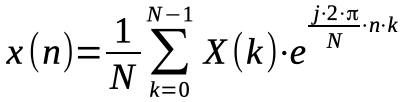

where $(3)$

$e^{jw} = cos(w) + j ⋅ sin(w)$

and j is the complex unit with the property $j^2 = -1$.

**Note**: The **coefficients** are usually **complex valued**.

**We see**: The inverse DFT describes **every signal** x(n) as **sum** of weighted sine and cosine **oscillations of different Frequencies**.

There are fast, very efficient algorithms for calculating the DFT and the inverse DFT. These are called "**Fast Fourier Transform**", in short "**FFT**".

In Python it is included in Package *numpy.fft*.

Example in ipython:

In [ ]:
x=np.sign(np.sin(2.0*np.pi/8*np.arange(0,8)))
print(x) 

import numpy.fft 

X=np.fft.fft(x)
print(X)

np.fft.ifft(X)


[ 0.  1.  1.  1.  1. -1. -1. -1.]
[ 1.+0.j         -1.-4.82842712j  1.+0.j         -1.-0.82842712j
  1.+0.j         -1.+0.82842712j  1.+0.j         -1.+4.82842712j]


array([ 0.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j,
       -1.+0.j])


with numpy.real(..) we get the original real valued signal from this complex output.

**Note**: The coefficients X are indeed **complex valued**. Furthermore, they are **symmetrical** about the center, but with the opposite sign in the imaginary parts (conjugated complex).

In order to see where this symmetry comes from, we plot the sinusoidal functions, for the **imaginary part** of the above DFT (equations (1), (2), (3)) for the frequency indices k = 1 and k = 7, which are symmetric around the center index of k=4. In ipython we get:

Text(0.5, 1.0, 'Sine Basis Functions 1 and 7')

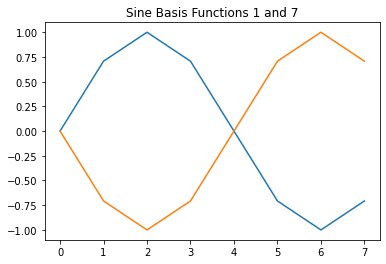

In [ ]:
x1=np.sin(2.0*np.pi/8*1*np.arange(0,8)) 
plt.plot(x1)  
x7=np.sin(2.0*np.pi/8*7*np.arange(0,8)) 
plt.plot(x7)
plt.title('Sine Basis Functions 1 and 7') 

Observe:

sin(2.0*pi/8*7*arange(0,8))=
sin(2.0*pi/8*(8-1)*arange(0,8))=
sin(2.0*pi/8*(-1)*arange(0,8))
which means the sine for k=7 is equal k=-1, as a **negative frequency**!


**We see** that these two cycles (also called "**basis functions**") are indeed identical, except for the opposite sign. The corresponding **cosine** functions for the **real part** would be **identical** for those frequency indices.

Hence the observed symmetry.

For this reason, we reach the highest frequency that can be represented with our sampling grid at the center frequency index k, in our example k = 4.

In ipython we take the cosine term for k = 4, because the sine term disappears here:

Text(0.5, 1.0, 'Cosine Basis Function for k=4')

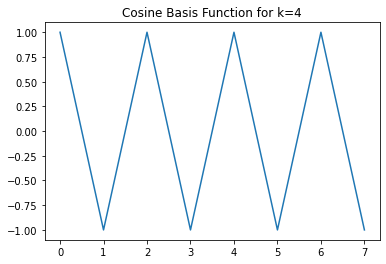

In [ ]:
x=np.cos(2.0*np.pi/8*4*np.arange(0,8))
plt.plot(x)
plt.title('Cosine Basis Function for k=4')

#**Python real time example:**
The audio signal from the microphone is divided into 1024 samples (blocks), the FFT is applied to each of these blocks, which means here we have a signal length of **N=1024** (also called FFT size), and then the magnitude of the coefficients X(k) is plotted live in the plot window. Remember that the highest possible frequency is the **Nyquist frequency**, which appears in the middle at index **k=N/2**=512. 
We run it in a shell with:

*python pyrecfftanimation.py*

**Note**: We again see the **symmetry** around the center. When whistling, we see larger coefficients at the **corresponding frequency index** k. 
We can alternatively represent the **magnitude** of the DFT coefficients as different **colors**. On the **x-axis** we again plot the frequency, where we only plot the first half of the DFT coefficients such that the coefficients with **the lowest frequencies are on the left** and those with the highest frequencies on the right.  Now we plot the **time on the y-axis**. In this way we get the so-called "**Waterfall Spectrogram**".

So: 

x-axis: Frequency

y-axis: time

Color: value (magnitude) of current DFT coefficients X(k)

We can see it through starting:

*python pyrecspecwaterfall.py*

**Observe**: When we whistle a tone, it appears like a yellow stripe, at the corresponding frequency and time of the tone. High tones appear more on the right.

We can also easily **apply** the DFT or FFT to **images** by first applying them to **each row** of the image, and then applying the DFT to **each column** on the result.

The corresponding function in python is “fft2”.

#**Python live video example:**

In python we use the function *numpy.fft.fft2(..)*

We calculate the 2D FFT for each frame, in the example for the green component of our video stream. We display the magnitude of FFT coefficients, again with *numpy.abs(..)*.

The script "videorecfftdisp.py" is shown below:

In [ ]:
#Program to capture a video from the default camera (0), compute the 2D FFT 
#on the Green component, take the magnitude (phase) and display it live on the screen 
#Gerald Schuller, Nov. 2014 
import cv2 
import numpy as np 

cap = cv2.VideoCapture(0) 

while(True): 
    # Capture frame-by-frame 
    [retval, frame] = cap.read()    
    #compute magnitude of 2D FFT of green component
    #with suitable normalization for the display: 
    frame=np.abs(np.fft.fft2(frame[:,:,1]/255.0))/512.0
    #angle/phase:
    #frame=(3.14+np.angle(np.fft.fft2(frame[:,:,1]/
    #255.0)))/6.28
    # Display the resulting frame 
    cv2.imshow('frame',frame) 
    #Keep window open until key 'q' is pressed: 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break 
# When everything done, release the capture 
cap.release() 
cv2.destroyAllWindows()

TypeError: ignored

We start it with:

*python videorecfftdisp.py*

and then keep our stripe test image in front of the camera, at different distances.

**We observe**: When the test image is held in front of the camera, a series of more or less thick and **bright dots** are formed, as on a line. The farther we remove the image from the camera (the greater the number of **brightness cycles per degree** for the camera), the **farther away and towards the center the dots appear**.

**Note**: The **location** of the points shows the **spatial frequency** that the camera sees. The **highest spatial frequencies** appear in the center of the image, with a **symmetry** around this center.

The **lowest horizontal spatial frequencies** are located on the **left and right edges**; the **lowest vertical spatial frequencies** are at the **upper and lower edge**.

**Note**: Together with the phase of the FFT components, this picture of the magnitudes still contains the entire information of the original video (since the FFT is invertible).

#**Reducing Aliasing/Moire**

We saw in our experiment that **Aliasing/Moire** occurred only at many brightness cycles per degree, i.e .at **high spatial frequencies**. We could avoid it if we would **set these high spatial frequencies in the image to zero** before we downsample the image. Since the **DFT is invertible**, we can achieve this by setting the corresponding DFT coefficients of the high spatial frequencies to zero and then using the IDFT to produce the image or video again.

We do this with a **Mask** that we multiply to the 2D DFT of our image or video. Let us assume that 1 is the highest frequency, the Nyquist frequency, and we only want to keep the DFT coefficients of the 1/4 lowest frequencies. One row has e.g. 640 pixels (and thus the DFT 640 coefficients per row). Because of the symmetry around the center, the highest frequency is in the center, and we get 2 halves with the same content. Therefore we have to keep only one-eighth of the total coefficients at each end, and set the remaining coefficients to zero. A corresponding mask for 1 dimension would be the following:

Text(0.5, 1.0, 'Mask for low Frequencies')

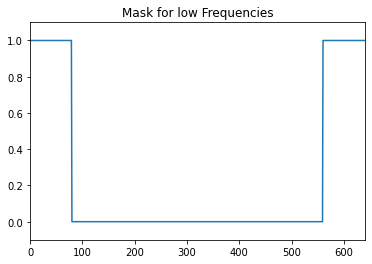

In [ ]:
M=np.ones((640))
M[(640//8):(640-640//8)]=np.zeros(round((3/4)*640))
plt.plot(M)
plt.axis([0, 640, -0.1, 1.1])
plt.title("Mask for low Frequencies")

Since this mask indicates which frequencies are are passed and which are attenuated, it is also called the "**Transfer Function**".

For **2 dimensions**, as in our case for pictures, we apply the mask simply for **each dimension**.
If r is the number of rows and c is the number of the columns, we obtain in python:

In [ ]:
[r,c,d]=frame.shape

#For rows: 
Mr=np.ones((r,1)) 
Mr[(r/8.0):(r-r/8.0),0]=np.zeros((3.0/4.0*r)) 
#For columns: 
Mc=np.ones((1,c)) 
Mc[0,(c/8.0):(c-c/8)]=np.zeros((3.0/4.0*c)); 
#Together: 
M=np.dot(Mr,Mc)# matrix multiply, 
#Mr: column, Mc: row
plt.plot(M)

AttributeError: ignored

If we multiply this mask (which we also call transfer function) with our DFT coefficients (element-wise), all the coefficients at high spatial frequencies are set to zero.

From the property that this mask is a "**Filter**" which only "passes" the lower frequencies, it is also called "**Lowpass Filter**".

We create the 2D FFT and set the high frequencies to zero:

In [ ]:
  X = np.fft.fft2(frame[:,:,1]/255.0) 
  #Set to zero the 3/4 highest spacial frequencies in each direction: 
  X = X * M 
  #lowpass version

TypeError: ignored

If we then inverse DFT transform these new coefficients, we get an **image / video without these high spatial frequencies:**

In [ ]:
x=np.abs(np.fft.ifft2(X))

IndexError: ignored

Note: Here, we use the command "abs" to get again real numbers, because the inverse FFT produces complex numbers, although here the imaginary parts become zero to accuracy.

The following **Python script** shows this process:

*python videorecfft0ifftdisp.py*

**Note**: The reconstructed image or video after the inverse FFT contains, in fact, less high spatial frequencies, and therefore looks more blurred.

We know from "Signals and Systems": A multiplication in the Fourier domain corresponds to a so-called **convolution** of the corresponding signals in the spatial or time domain. Since here we have finite signals whose length is N, we obtain a so-called **circular convolution**. If we inverse transform the filter (or the mask) back into the spatial domain, the result is called "**Impulse Response**" of the filter.


Suppose that x(n) is our signal in the spatial domain, and h(n) is our filter in the spatial domain (the impulse response), then the circular convolution is,

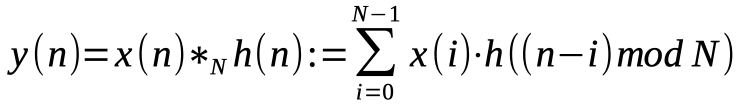

where "mod" is the "modulus" function, the remainder after integer division of (n-i) by N (after N-1 follows 0). This convolution sum runs “in a circle".
The h(n) is the inverse FFT of our mask M (here in the example for better visibility for the 1/8 lowest frequencies). In ipython:

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Sample Value')

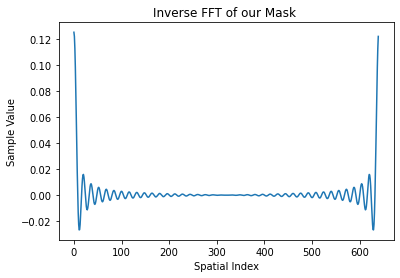

In [ ]:
M=np.ones((640))
M[(640//16):(640-640//16)]=np.zeros(round(7.0/8.0*640))
h=np.fft.ifft(M)
plt.plot(h)
plt.title("Inverse FFT of our Mask ")
plt.xlabel("Spatial Index")
plt.ylabel("Sample Value")

Due to the circular convolution, the signal (the impulse response) runs practically "in a circle", so we can also consider a version cyclically shifted by 320 values:

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Sample Value')

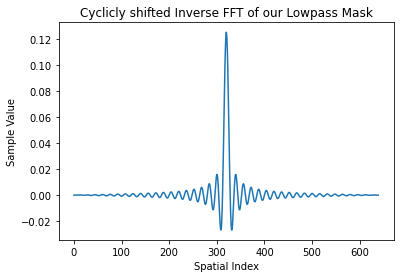

In [ ]:
hc=np.concatenate((h[320:640],h[0:320])) 
plt.plot(hc)
plt.title("Cyclicly shifted Inverse FFT of our Lowpass Mask")
plt.xlabel("Spatial Index")
plt.ylabel("Sample Value")

**Note**: This is now like the **Sinc** or **Si-function** with which the weights of the retinal receptors or receptive fields have a similarity. 

If, after this low-pass filtering, we perform the **downsampling by the factor N**, this means that we only take every Nth pixel or Nth sample. This corresponds to the substitution of our index n in the convolution equation by mN, where m is an integer:

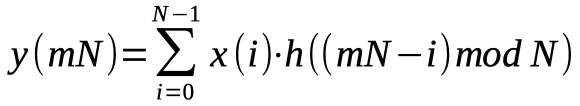

This sum shows us: for each sample y(mN), we compute a sum over the shifted impulse response of the filter at the position mN: 

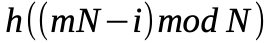

**Example** in ipython: We take our already calculated impulse response hc and set N = 8. For 2 adjacent positions m and m + 1 then we get, for a section with the approximately 40 largest values:

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Sample Value')

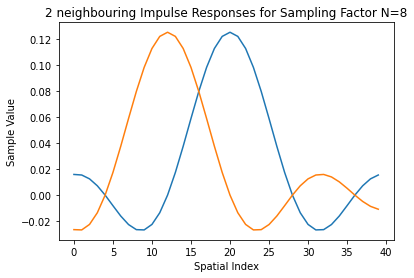

In [ ]:
plt.plot(hc[300:340])
plt.plot(hc[308:348])
plt.title("2 neighbouring Impulse Responses for Sampling Factor N=8" )
plt.xlabel("Spatial Index")
plt.ylabel("Sample Value")

**Note**: We see an **overlapping** of the neighboring impulse responses. This corresponds to the **overlap of the receptive fields on the retina!**

We can see the inverse FFT of our 2D mask M in ipython:

Text(0, 0.5, 'Spatial Index')

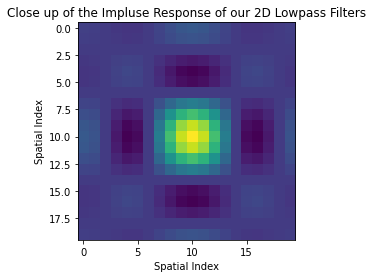

In [ ]:
r=480
c=640
#For rows: 
Mr=np.ones((r,1)) 
Mr[(r//8):(r-r//8),0]=np.zeros(round(3.0/4.0*r)) 
#For columns: 
Mc=np.ones((1,c)) 
Mc[0,(c//8):(c-c//8)]=np.zeros(round(3.0/4.0*c)); 
#Together: 
M=np.dot(Mr,Mc)
h=np.fft.ifft2(M)
#Rotieren:
hc=np.concatenate((h[:,320:640],h[:,0:320]),axis=1) 
hc2=np.concatenate((hc[240:480,:],hc[0:240,:]),axis=0)
plt.imshow(np.real(hc2[230:250,310:330])/0.07)
plt.title('Close up of the Impluse Response of our 2D Lowpass Filters') 
plt.xlabel("Spatial Index")
plt.ylabel("Spatial Index")

Color value corresponds to the sample value. Deep blue are the smallest (negative) values, yellow the largest (positive) values.

**Note**: This false colors illustration of inverse FFT, the 2D-impulse response, now also resembles the **observed receptive fields** in retina, with its lateral inhibition.

A good visualization of the 2D convolution with this 2D impulse response (receptive filed), followed by downsampling, can be seen here:

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html" allowfullscreen></iframe>')

/usr/local/lib/python3.9/dist-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


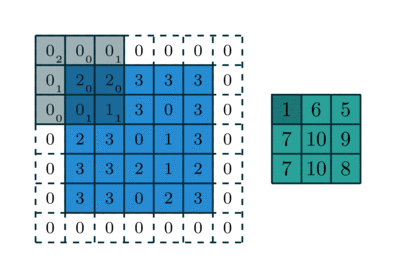

This is from: http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html
which is a tutorial about Convolutional Neural Networks, which are also using 2D convolution with donwsampling (there the downsampling factor is called “strides”).
(The animation does not work in pdf, so go to the website to see it animated)
The larger blue rectangle is the image, the smaller gray rectangle is the 2D Filter Impulse Response / Filter Kernel / Receptive Field, and the smaller green rectangle is the output after filtering and downs-sampling.

#**Python example:**
The Library “scipy.signal” contains a function for 2D convolution:

*scipy.signal.convolve2d(x,h)*

It convolves two 2-dimensional signals x and h, where x is e.g. our frame and h is our filter impulse response. We use these in the script 

*videofiltdisp.py.*

We calculate the impulse response h as an inverse FFT of our transfer function M. We must limit the **size** of the **2D impulse response drastically**, so that a real-time processing is possible. For FFT filters with a large impulse response, the calculation **using FFT is much more efficient** than the convolution.

We run the script with:

*python videofiltdisp.py*

**Note**: The filtered image / video looks similar to the implementation using FFT (except for less ringing artefacts).

Thus we see that the **receptive fields** on the retina correspond to a **filtering** of the image, and the **distance** between the nerves corresponds to the **downsampling** for the smaller number of optic nerves.

The "transfer function" of the human eye can also be measured experimentally by visual tests. This results in the so-called "**Contrast Sensitivity Function**" (CSF). example:

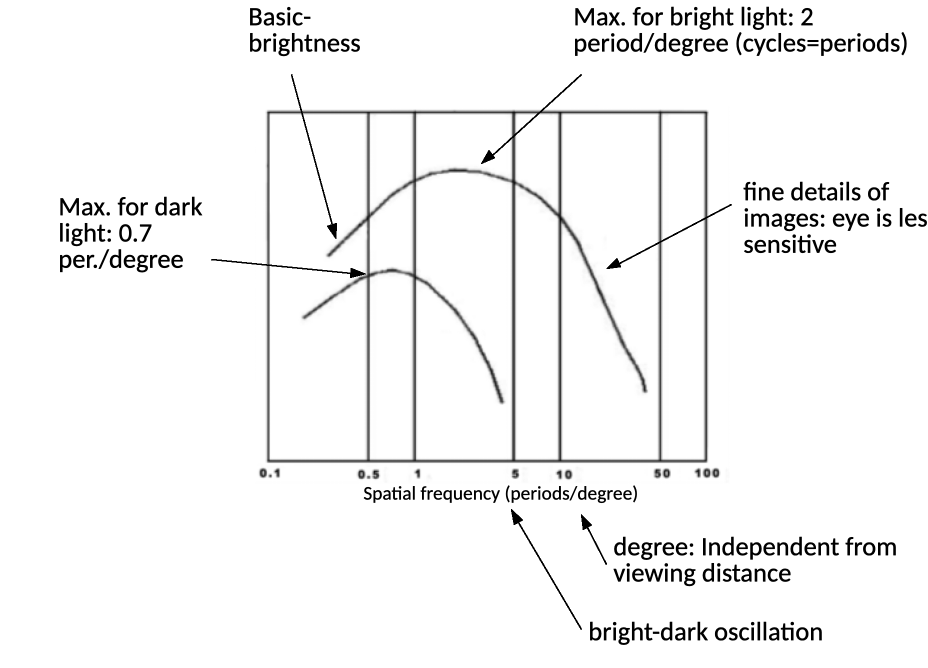

(From: http://www.ee.sieu.edu/~sumbaug/CVIPbook_PPLec/Chapter7.ppt)

We see: The Transfer function is not exactly a low pass filter, but rather a kind of low-pass with an increase at the center frequencies. Our eye is most sensitive to these center spatial frequencies.

Through adapted tests, the CSF can also be determined from the eyes of other living creatures

#**Comparison of Contrast Sensitivity Function of different creatures**

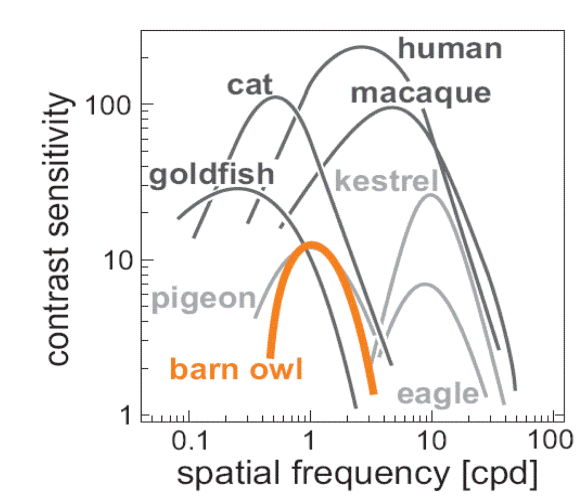

from: Harmening, Vossen, Wagner, van der Willigen “The disparity sesitivity function compared – new insights from barn owl vision,” EVCP09

The different number of rods and cones on the retina is noticeable by different CSF’s for color and brightness:

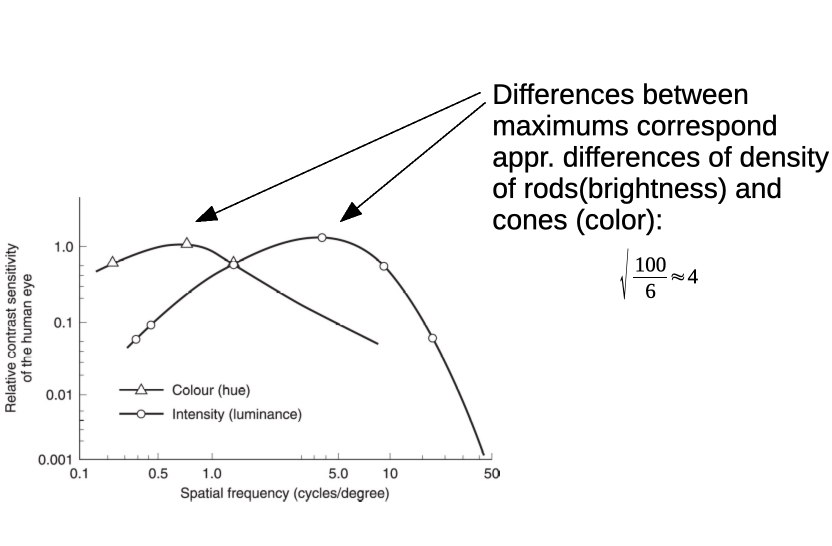

#**Reconstruction of the Image in the Decoder**

We can now **transmit the downsampled image** (**without the zeros** between the samples) to the decoder, hence with fewer pixels and thus a smaller bit rate. How do we reconstruct a picture with the original size?

We have seen that if we just put the transmitted pixels in the right place, leaving the other pixels at zero value, we get a picture which consists of many small points.

It is interesting to look at the spectrum of this point image. This is done with the following python script. 

In Python we can write the down sampling without keeping zeros on the encoder side as

In [ ]:
#The following X is the lowpass version
Y0=np.abs(np.fft.ifft2(X))
#Downsampling, keep no zeros for transmission:
Ds=Y0[0::N,::N];

IndexError: ignored

Ds has much fewer samples and is then transmitted. On the decoding Side we need up-sampling by re-inserting zeros to obtain the original image size back:

In [ ]:
[rows,cols,c]=frame.shape;

Ds0=np.zeros((rows,cols));

#Upsampling, insert zeros:
Ds0[0::N,::N]=Ds

AttributeError: ignored

We start our program with:

*python videofft0ifftresampleykey.py*

First we turn sampling on with key “s”.

**We see**: The 2D FFT of the “sampling on” version contains **periodic repetitions of the spectrum** in the x- and y-direction. 

Since these were not present in the original, they represent artifacts (namely, our **aliasing**). The corresponding decoded video correspondingly consists only of small dots. 

To avoid or reduce the aliasing we should simply **set the periodic spectral copies to zero**. This works again with our mask or the low-pass filter M, which we apply again in the FFT domain, this time in the decoder.

**Note**: The **reconstructed image in the decoder** in the window "Decoder: Filtered Sampled Frames" actually looks almost like our **encoder in the low-pass filtered image**!

To do this, turn the filter on with the key “f”: 
In the FFT window, the spectral copies are indeed gone, and in the decoder window we see a reasonable video, but a little blurry.

#**Summary:**

Our encoder-decoder sequence contains the following steps:

- Encoder: Low Pass Filtering- downsampling- Removing zeros  

- Decoder: Filling zeros- Low Pass Filtering

We are able to **reduce** the **number of pixels** to be transmitted by the factor N * N, with the same image size, but at the expense of some image quality. This represents a **further compression capability**.

The problem is now to choose the number of transmitted pixels (the resolution) so that the eye does not perceive the blurryness.  

#**References:**

- Circular convolution, (“zyklische Faltung”), sh. p. 542, 

- Spectrogram: p. 742:

- A. Openheim, R. Schafer: “Discrete Time Signal Processing”, Prentice Hall.

#**Quantiziation**
In a Video-Coder we must quantize our values, for which we need to know how many intensity steps the human eye can distinguish:

- About 20 brightness changes in a small area in a complex image.
- About 100 grayscale levels required (7 bit/pixel) to avoid artificial contours in slowly changing gray levels.

From: www.ee.siue.edu/~sumbaug/CVIPbook_PPLec/Chapter7.ppt